# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [2]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape, output_units = 10, num_neurons= [512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units = n_units, activation='relu', name='hidden_layer'+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units = n_units, activation='relu', name='hidden_layer'+str(i+1))(x)
    out = keras.layers.Dense(units = output_units, activation='softmax', name='output')(x)
    model = keras.models.Model(inputs = [input_layer], outputs = [out])
    return model

In [7]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3]
EPOCHS = 50
MOMENTUM = 0.95
NESTEROV = True
BATCH_SIZE = 256

In [ ]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""

for lr in LEARNING_RATE:
    keras.backend.clear_session()
    print('experiment with learning rate= %.6f' % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizers = keras.optimizers.SGD(lr=lr, momentum=MOMENTUM, nesterov=NESTEROV)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer = optimizers)
    model.fit(x_train, y_train, epochs=EPOCHS, batch_size = BATCH_SIZE, validation_data = (x_test, y_test), shuffle=True)

    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]

    exp_name_tag = 'exp-lr-%s' % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                            'valid-loss': valid_loss,
                            'train-accuracy': train_acc,
                            'valid-accuracy': valid_acc}


experiment with learning rate= 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=

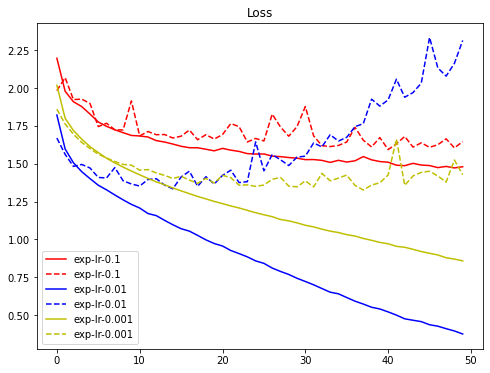

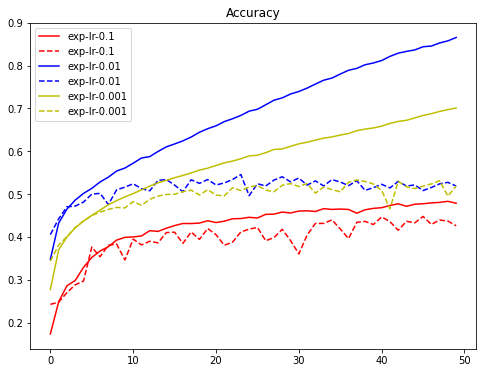

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ['r', 'b', 'y']
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label = cond, color = color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '--', label = cond, color = color_bar[i])
plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-accuracy'])), results[cond]['train-accuracy'], '-', label = cond, color = color_bar[i])
    plt.plot(range(len(results[cond]['valid-accuracy'])), results[cond]['valid-accuracy'], '--', label = cond, color = color_bar[i])
plt.title('Accuracy')
plt.legend()
plt.show()

In [ ]:
results1 = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""

for lr in LEARNING_RATE:
    keras.backend.clear_session()
    print('experiment with learning rate= %.6f' % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizers = keras.optimizers.RMSprop(lr=lr)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer = optimizers)
    model.fit(x_train, y_train, epochs=EPOCHS, batch_size = BATCH_SIZE, validation_data = (x_test, y_test), shuffle=True)

    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]

    exp_name_tag = 'exp-lr-%s' % str(lr)
    results1[exp_name_tag] = {'train-loss': train_loss,
                            'valid-loss': valid_loss,
                            'train-accuracy': train_acc,
                            'valid-accuracy': valid_acc}

experiment with learning rate= 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=

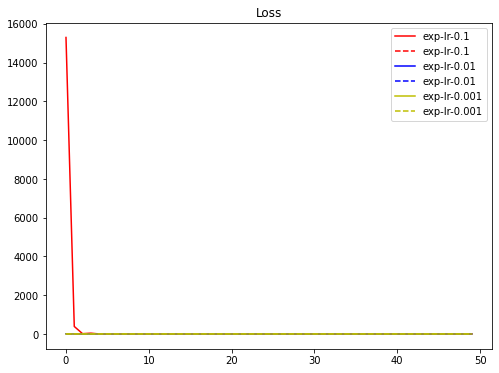

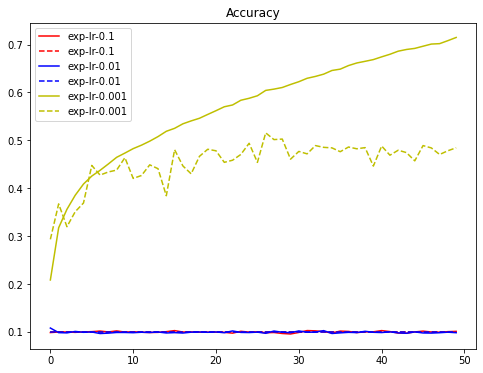

In [ ]:
color_bar = ['r', 'b', 'y']
plt.figure(figsize=(8,6))
for i, cond in enumerate(results1.keys()):
    plt.plot(range(len(results1[cond]['train-loss'])), results1[cond]['train-loss'], '-', label = cond, color = color_bar[i])
    plt.plot(range(len(results1[cond]['valid-loss'])), results1[cond]['valid-loss'], '--', label = cond, color = color_bar[i])
plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results1.keys()):
    plt.plot(range(len(results1[cond]['train-accuracy'])), results1[cond]['train-accuracy'], '-', label = cond, color = color_bar[i])
    plt.plot(range(len(results1[cond]['valid-accuracy'])), results1[cond]['valid-accuracy'], '--', label = cond, color = color_bar[i])
plt.title('Accuracy')
plt.legend()
plt.show()

In [ ]:
results2 = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""

for lr in LEARNING_RATE:
    keras.backend.clear_session()
    print('experiment with learning rate= %.6f' % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizers = keras.optimizers.adagrad(lr=lr)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer = optimizers)
    model.fit(x_train, y_train, epochs=EPOCHS, batch_size = BATCH_SIZE, validation_data = (x_test, y_test), shuffle=True)

    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]

    exp_name_tag = 'exp-lr-%s' % str(lr)
    results2[exp_name_tag] = {'train-loss': train_loss,
                            'valid-loss': valid_loss,
                            'train-accuracy': train_acc,
                            'valid-accuracy': valid_acc}


experiment with learning rate= 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=

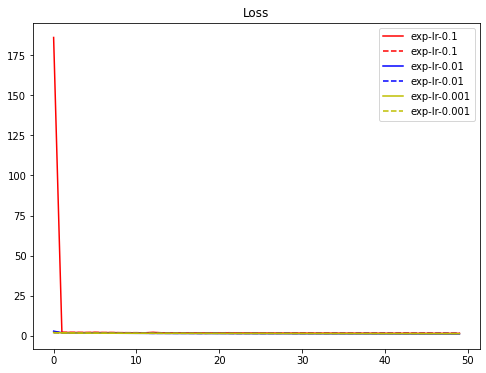

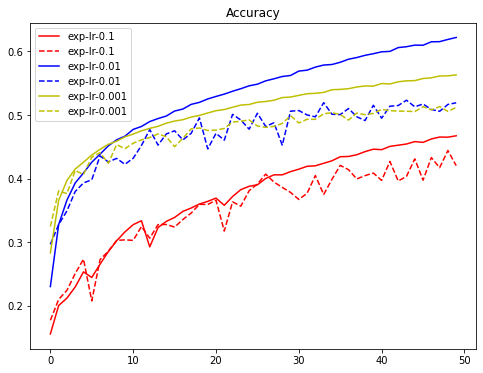

In [ ]:
color_bar = ['r', 'b', 'y']
plt.figure(figsize=(8,6))
for i, cond in enumerate(results2.keys()):
    plt.plot(range(len(results2[cond]['train-loss'])), results2[cond]['train-loss'], '-', label = cond, color = color_bar[i])
    plt.plot(range(len(results2[cond]['valid-loss'])), results2[cond]['valid-loss'], '--', label = cond, color = color_bar[i])
plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results2.keys()):
    plt.plot(range(len(results2[cond]['train-accuracy'])), results2[cond]['train-accuracy'], '-', label = cond, color = color_bar[i])
    plt.plot(range(len(results2[cond]['valid-accuracy'])), results2[cond]['valid-accuracy'], '--', label = cond, color = color_bar[i])
plt.title('Accuracy')
plt.legend()
plt.show()

In [8]:
results3 = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""

for lr in LEARNING_RATE:
    keras.backend.clear_session()
    print('experiment with learning rate= %.6f' % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizers = keras.optimizers.adam(lr=lr)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer = optimizers)
    model.fit(x_train, y_train, epochs=EPOCHS, batch_size = BATCH_SIZE, validation_data = (x_test, y_test), shuffle=True)

    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]

    exp_name_tag = 'exp-lr-%s' % str(lr)
    results3[exp_name_tag] = {'train-loss': train_loss,
                            'valid-loss': valid_loss,
                            'train-accuracy': train_acc,
                            'valid-accuracy': valid_acc}


experiment with learning rate= 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=

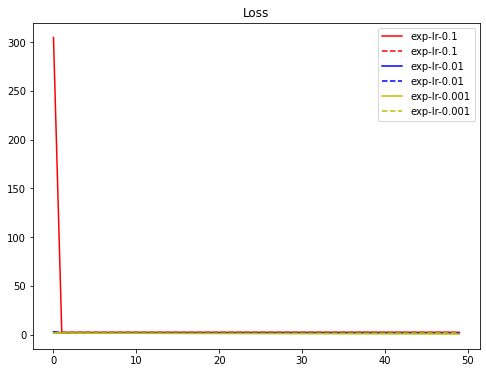

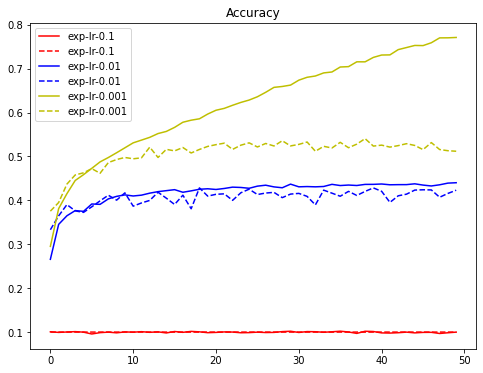

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ['r', 'b', 'y']
plt.figure(figsize=(8,6))
for i, cond in enumerate(results3.keys()):
    plt.plot(range(len(results3[cond]['train-loss'])), results3[cond]['train-loss'], '-', label = cond, color = color_bar[i])
    plt.plot(range(len(results3[cond]['valid-loss'])), results3[cond]['valid-loss'], '--', label = cond, color = color_bar[i])
plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results3.keys()):
    plt.plot(range(len(results3[cond]['train-accuracy'])), results3[cond]['train-accuracy'], '-', label = cond, color = color_bar[i])
    plt.plot(range(len(results3[cond]['valid-accuracy'])), results3[cond]['valid-accuracy'], '--', label = cond, color = color_bar[i])
plt.title('Accuracy')
plt.legend()
plt.show()